<a href="https://colab.research.google.com/github/javedbaig/text-reading-in-the-wild/blob/main/image_to_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Todos
# how to select text in the image using ocr techniques
# how to recognize the selected text

In [1]:
print("========================= Importing Packages =========================")
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from keras.preprocessing import image
from PIL import Image
import cv2

# Warning handler
import warnings
warnings.filterwarnings('ignore')
print("========================= Imported  Packages =========================")
print("")

========================= Importing Packages =========================
========================= Imported  Packages =========================



In [2]:
# Loading Data
print("============================ Loading Data ============================")
handwriting_mnist = keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = handwriting_mnist.load_data()
train_images = train_images.reshape(len(train_images),28,28,1)
test_images = test_images.reshape(len(test_images),28,28,1)
print("========================== Loading Complete ==========================")
print("")

============================ Loading Data ============================
11490434/11490434 [==============================] - 0s 0us/step
========================== Loading Complete ==========================



========================== Visualizing Data ==========================


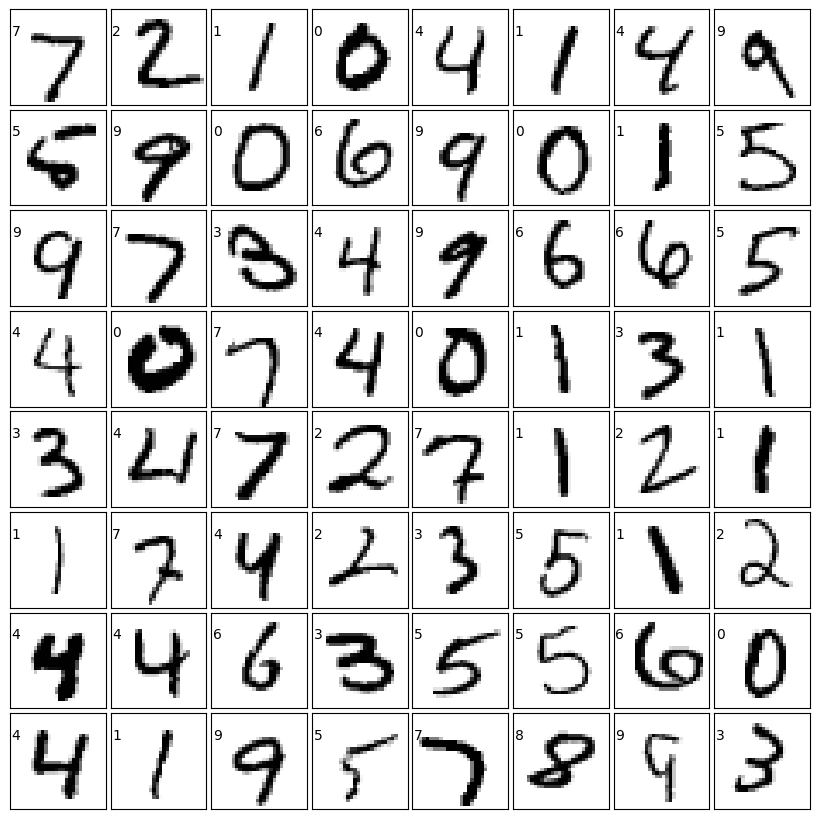

In [3]:
# Test Data Visualization
print("========================== Visualizing Data ==========================")
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(test_images[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(test_labels[i]))
plt.show()
print("")

In [6]:

# Creating model
print("========================== Creating a model ==========================")
model = keras.models.Sequential([
                                 keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu',input_shape=(28,28,1)),
                                 keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
                                 keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                 keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
                                 keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
                                 keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                 keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
                                 keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
                                 keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                 keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
                                 keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
                                 keras.layers.MaxPooling2D(pool_size=(2, 2)),

                                 # Flatten the convolutional output
                                 keras.layers.Flatten(),

                                 # Fully connected layers
                                 keras.layers.Dense(512, activation='relu'),
                                 keras.layers.Dense(256, activation='relu'),

                                 # Output layer
                                 keras.layers.Dense(10, activation='softmax')

])
print("")
print("============================ modelSummary ============================")
print(model.summary())
print("")
# Model Compile
print("========================== Compiling  model ==========================")
model.compile(optimizer='adam',metrics=['acc'],loss='sparse_categorical_crossentropy')
print("")
print("========================== Model's Compiled ==========================")
# Accuracy Callback
#class handwriting_acc_callback(keras.callbacks.Callback):
#  def on_epoch_end(self,epoch,logs={}):
#    if(logs.get('acc')>=0.9):
#       print("\n Model has reached 90% accuracy! Congratulations !!!!!")
#       self.model.stop_training = True
#
#handwriting_acc_callback = handwriting_acc_callback()
#print("")


========================== Creating a model ==========================

============================ modelSummary ============================
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        36928     
                                             

In [7]:

# Model Fitting
print("============================= Model- Fit =============================")
model.fit(train_images,train_labels,epochs=2)
print("")
# Model Evaluation
print("========================== Model Evaluation ==========================")
model.evaluate(test_images,test_labels)
print("")
print("======================================================================")
print("======================================================================")
print("======= Congratulations model was succesful with >90% accuracy =======")
print("======================================================================")
print("======================================================================")
print("")
print("================= Now goahead and run the next cell! =================")


============================= Model- Fit =============================
Epoch 1/2
1875/1875 [==============================] - 26s 7ms/step - loss: 0.1726 - acc: 0.9464
Epoch 2/2
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0764 - acc: 0.9801

========================== Model Evaluation ==========================
313/313 [==============================] - 1s 4ms/step - loss: 0.0543 - acc: 0.9845

======= Congratulations model was succesful with >90% accuracy =======

================= Now goahead and run the next cell! =================


In [8]:
import keras.utils as image

========================== Model Prediction ==========================


Saving 9-test.jpg to 9-test.jpg
**************** Uploaded Image ****************


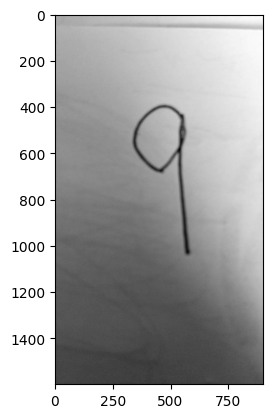

1/1 [==============================] - 0s 20ms/step
[[0.06438632 0.20784155 0.10081843 0.09728002 0.07549652 0.07198033
  0.07854579 0.09786785 0.13730165 0.06848153]]
Predicted Value is: [1]


In [13]:
# Model Prediction
print("========================== Model Prediction ==========================")
uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path)
  x = image.img_to_array(img)
  x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
  print("**************** Uploaded Image ****************")
  plt.imshow(x,cmap='gray')
  plt.show()
  x = cv2.resize(np.array(x), (28, 28))
  x = x.reshape(28,28,1)
  x = np.expand_dims(x, axis=0)

  class_label = model.predict(x)
  print(class_label)
  print("Predicted Value is:",np.where(class_label[0]==max(class_label[0]))[0])